Text(0, 0.5, 'Theta (deg)')

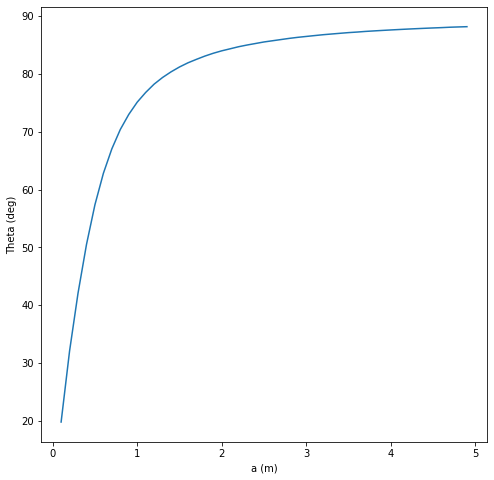

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

tstep=0.001 #timestep
# mass and gravity

m=1
g=9.81
#Equation for lambda (which I will call lamb to avoid problems with keyword lambda)
def lamb(x,z,vx,vz,a): 
    return m*(g*z-vz+vx/a**2)/(2*(z**2+x**2/a**4))


ans=[]
for a in np.arange(0.1,5,step=0.1): #range of a's to try
    #initial x and z and velocities
    x_0=0.001
    z_0=1
    vx_0=0
    vz_0=0
    lamb_val=lamb(x_0,z_0,vx_0,vz_0,a)
    while np.around(lamb_val,8)>0:  #find where lambda changes sign 
        x_0=x_0+vx_0*tstep
        z_0=z_0+vz_0*tstep
        vx_0=vx_0+ (x_0/a**2)*(g*z_0-vz_0+vx_0/a**2)/(z_0**2+x_0**2/a**4)*tstep #using the x'' equation
        vz_0=vz_0 +((z_0*(g*z_0-vz_0+vx_0/a**2)/(z_0**2+x_0**2/a**4))-g)*tstep  #using z''
        lamb_val=lamb(x_0,z_0,vx_0,vz_0,a)
    if lamb_val<0:
        ans.append(-np.arctan(x_0/z_0)*180/np.pi)

figure(1,figsize=(8,8))
plt.plot(np.arange(0.1,5,step=0.1),ans)
plt.xlabel('a (m)')
plt.ylabel("Theta (deg)")

    
        
        
    
    
    